## Запуск

+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import matthews_corrcoef

In [2]:
df = pd.read_csv('Data\wine_cleared.csv')  # чтение данных
print(f"Размер датасета: {df.shape}")
print("Первые 5 строк:")
df.head()

Размер датасета: (129971, 13)
Первые 5 строк:


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Основная информация о датасете
print("Информация о датасете:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB
None

О

In [4]:
# Интерактивное исследование данных с помощью dtale
import dtale

# Запускаем dtale для интерактивного анализа
d = dtale.show(df)

# Выводим URL для доступа к интерфейсу
print(f"Dtale запущен. Откройте браузер по адресу: {d._url}")


Dtale запущен. Откройте браузер по адресу: http://Rigel:40000


## 2. Описательная статистика. Меры центральной тенденции в Python

In [5]:
# Вычисляем наименьший балл за вино в датасете
min_points = df['points'].min()
print(f"Наименьший балл за вино в датасете: {min_points}")



Наименьший балл за вино в датасете: 80


*Мера центральной тенденции* — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

Вычисляем среднее значение с помощью statistics.mean()


In [6]:
# Вычисляем среднюю стоимость бутылки вина при помощи стандартных функций Python
# Сначала удаляем пропущенные значения из столбца price
prices = df['price'].dropna()

# Вычисляем среднее значение
mean_price = sum(prices) / len(prices)
print(f"Средняя стоимость бутылки вина: ${mean_price:.2f}")


# Вычисляем среднее значение с помощью statistics.mean()
mean_price_stats = statistics.mean(prices)
print(f"Средняя стоимость бутылки вина (statistics): ${mean_price_stats:.2f}")


Средняя стоимость бутылки вина: $35.36
Средняя стоимость бутылки вина (statistics): $35.36


Вычисляем медианное значение с помощью statistics.median()

In [7]:
# Вычисляем медианную стоимость бутылки вина при помощи стандартных функций Python
# Сначала удаляем пропущенные значения из столбца price
prices = df['price'].dropna()

# Вычисляем медианное значение
sorted_prices = sorted(prices)
n = len(sorted_prices)
if n % 2 == 0:
    median_price = (sorted_prices[n//2 - 1] + sorted_prices[n//2]) / 2
else:
    median_price = sorted_prices[n//2]
print(f"Медианная стоимость бутылки вина: ${median_price:.2f}")


# Вычисляем медианное значение с помощью statistics.median()
median_price_stats = statistics.median(prices)
print(f"Медианная стоимость бутылки вина (statistics): ${median_price_stats:.2f}")

Медианная стоимость бутылки вина: $28.00
Медианная стоимость бутылки вина (statistics): $28.00


Вычисляем моду стоимости бутылки вина при помощи statistics.mode()

In [8]:
# Вычисляем моду стоимости бутылки вина при помощи statistics.mode()
# Сначала удаляем пропущенные значения из столбца price
prices = df['price'].dropna()

# Вычисляем моду (самую часто встречающуюся цену)
mode_price = statistics.mode(prices)
print(f"Мода стоимости бутылки вина (statistics): ${mode_price:.2f}")


# Вычисляем моду стоимости бутылки вина при помощи стандартных функций Python
# Используем collections.Counter для подсчета частоты каждой цены
from collections import Counter

price_counts = Counter(prices)
# Находим максимальную частоту
max_count = max(price_counts.values())
# Находим все цены с максимальной частотой
mode_prices_manual = [price for price, count in price_counts.items() if count == max_count]
print(f"Мода стоимости бутылки вина (стандартные функции Python): ${mode_prices_manual[0]:.2f}")
print(f"Количество вин с этой ценой: {max_count}")

# Вычисляем моду с помощью pandas
mode_price_pandas = df['price'].mode()
print(f"Мода стоимости бутылки вина (pandas): ${mode_price_pandas.iloc[0]:.2f}")



Мода стоимости бутылки вина (statistics): $35.36
Мода стоимости бутылки вина (стандартные функции Python): $35.36
Количество вин с этой ценой: 8996
Мода стоимости бутылки вина (pandas): $35.36


## 3. Корреляция

In [9]:
# Вычисляем коэффициент корреляции между переменными в датасете
# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print("Матрица корреляций:")
print(correlation_matrix)

# Получаем коэффициент корреляции между ценой за бутылку и баллами за вино
price_points_correlation = correlation_matrix.loc['price', 'points']
print(f"\nКоэффициент корреляции между ценой за бутылку и баллами за вино: {price_points_correlation:.6f}")



Матрица корреляций:
            Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004652
points        0.007124  1.000000  0.402137
price         0.004652  0.402137  1.000000

Коэффициент корреляции между ценой за бутылку и баллами за вино: 0.402137


## 4. Типы корреляций. Корреляция Пирсона

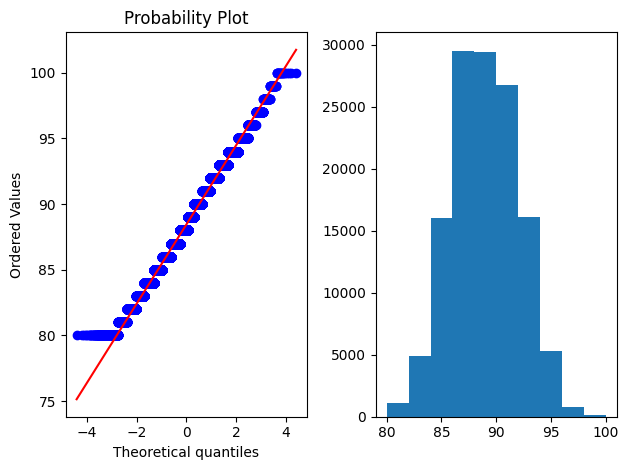

In [10]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

## 5. Типы корреляций. Ранговые корреляции

In [11]:
# Рассчитываем коэффициент корреляции Спирмена между признаками points и price
from scipy.stats import spearmanr

# Удаляем пропущенные значения для корректного расчета
df_clean = df[['points', 'price']].dropna()

# Вычисляем коэффициент корреляции Спирмена
spearman_corr, p_value = spearmanr(df_clean['points'], df_clean['price'])

print(f"Коэффициент корреляции Спирмена между points и price: {spearman_corr:.2f}")
print(f"P-значение: {p_value:.6f}")


Коэффициент корреляции Спирмена между points и price: 0.58
P-значение: 0.000000


In [12]:
# Рассчитываем коэффициент корреляции Кендалла между признаками points и price
from scipy.stats import kendalltau

# Используем уже очищенные данные без пропущенных значений
kendall_corr, p_value = kendalltau(df_clean['points'], df_clean['price'])

print(f"Коэффициент корреляции Кендалла между points и price: {kendall_corr:.2f}")
print(f"P-значение: {p_value:.6f}")


Коэффициент корреляции Кендалла между points и price: 0.43
P-значение: 0.000000


In [14]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

## 6. Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных

+ BMI — индекс массы тела (ИМТ)
+ year — год размещения модели в журнале
+ month — месяц размещения
+ waist — обхват талии модели
+ hips — обхват бёдер модели
+ height — рост модели
+ weight — вес модели
+ waist/hip — соотношение обхвата талии и бёдер

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import matthews_corrcoef

In [15]:
df = pd.read_csv('Data\model.csv')  # чтение данных
print(f"Размер датасета: {df.shape}")
print("Первые 5 строк:")
df.head()

Размер датасета: (662, 8)
Первые 5 строк:


,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916


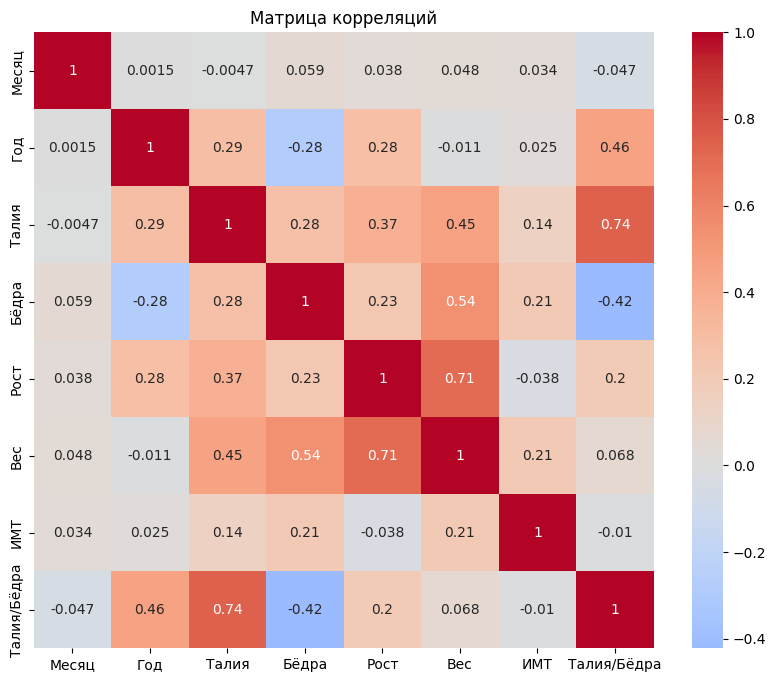

Самый высокий коэффициент корреляции: 0.74


In [27]:
# Преобразуем столбец 'Month' в категориальный для работы с корреляцией
df['Month'] = pd.Categorical(df['Month']).codes

# Построение матрицы корреляций
correlation_matrix = df.corr()

# Переименовываем столбцы и индексы на русский язык
russian_names = {
    'Month': 'Месяц',
    'Year': 'Год', 
    'Waist': 'Талия',
    'Hips': 'Бёдра',
    'Height': 'Рост',
    'Weight': 'Вес',
    'BMI': 'ИМТ',
    'Waist/Hip': 'Талия/Бёдра'
}

# Переименовываем столбцы и индексы матрицы корреляций
correlation_matrix_ru = correlation_matrix.rename(columns=russian_names, index=russian_names)

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ru, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

# Найдем самый высокий коэффициент корреляции (исключая диагональные элементы)
# Создаем маску для исключения диагональных элементов
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_values = correlation_matrix.mask(mask)

# Находим максимальное значение корреляции
max_correlation = correlation_values.max().max()
print(f"Самый высокий коэффициент корреляции: {max_correlation:.2f}")



<Axes: xlabel='Waist/Hip', ylabel='Waist'>

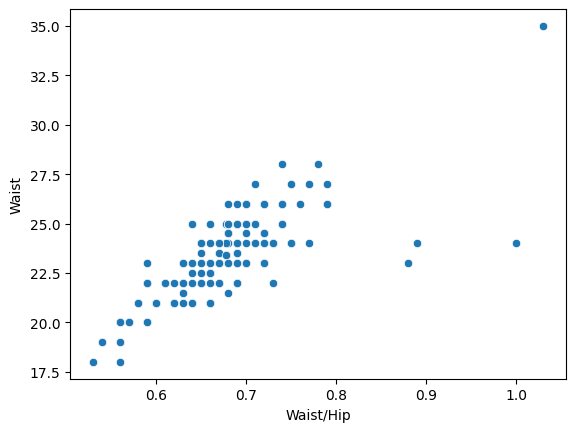

In [20]:
sns.scatterplot(data=df, x="Waist/Hip", y="Waist")

<Axes: xlabel='Weight', ylabel='Year'>

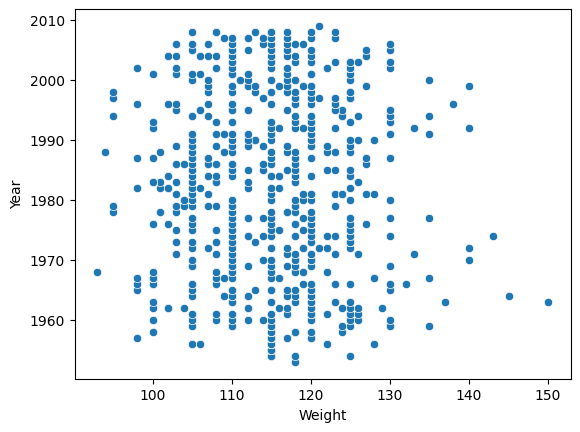

In [22]:
sns.scatterplot(data=df, x="Weight", y="Year")

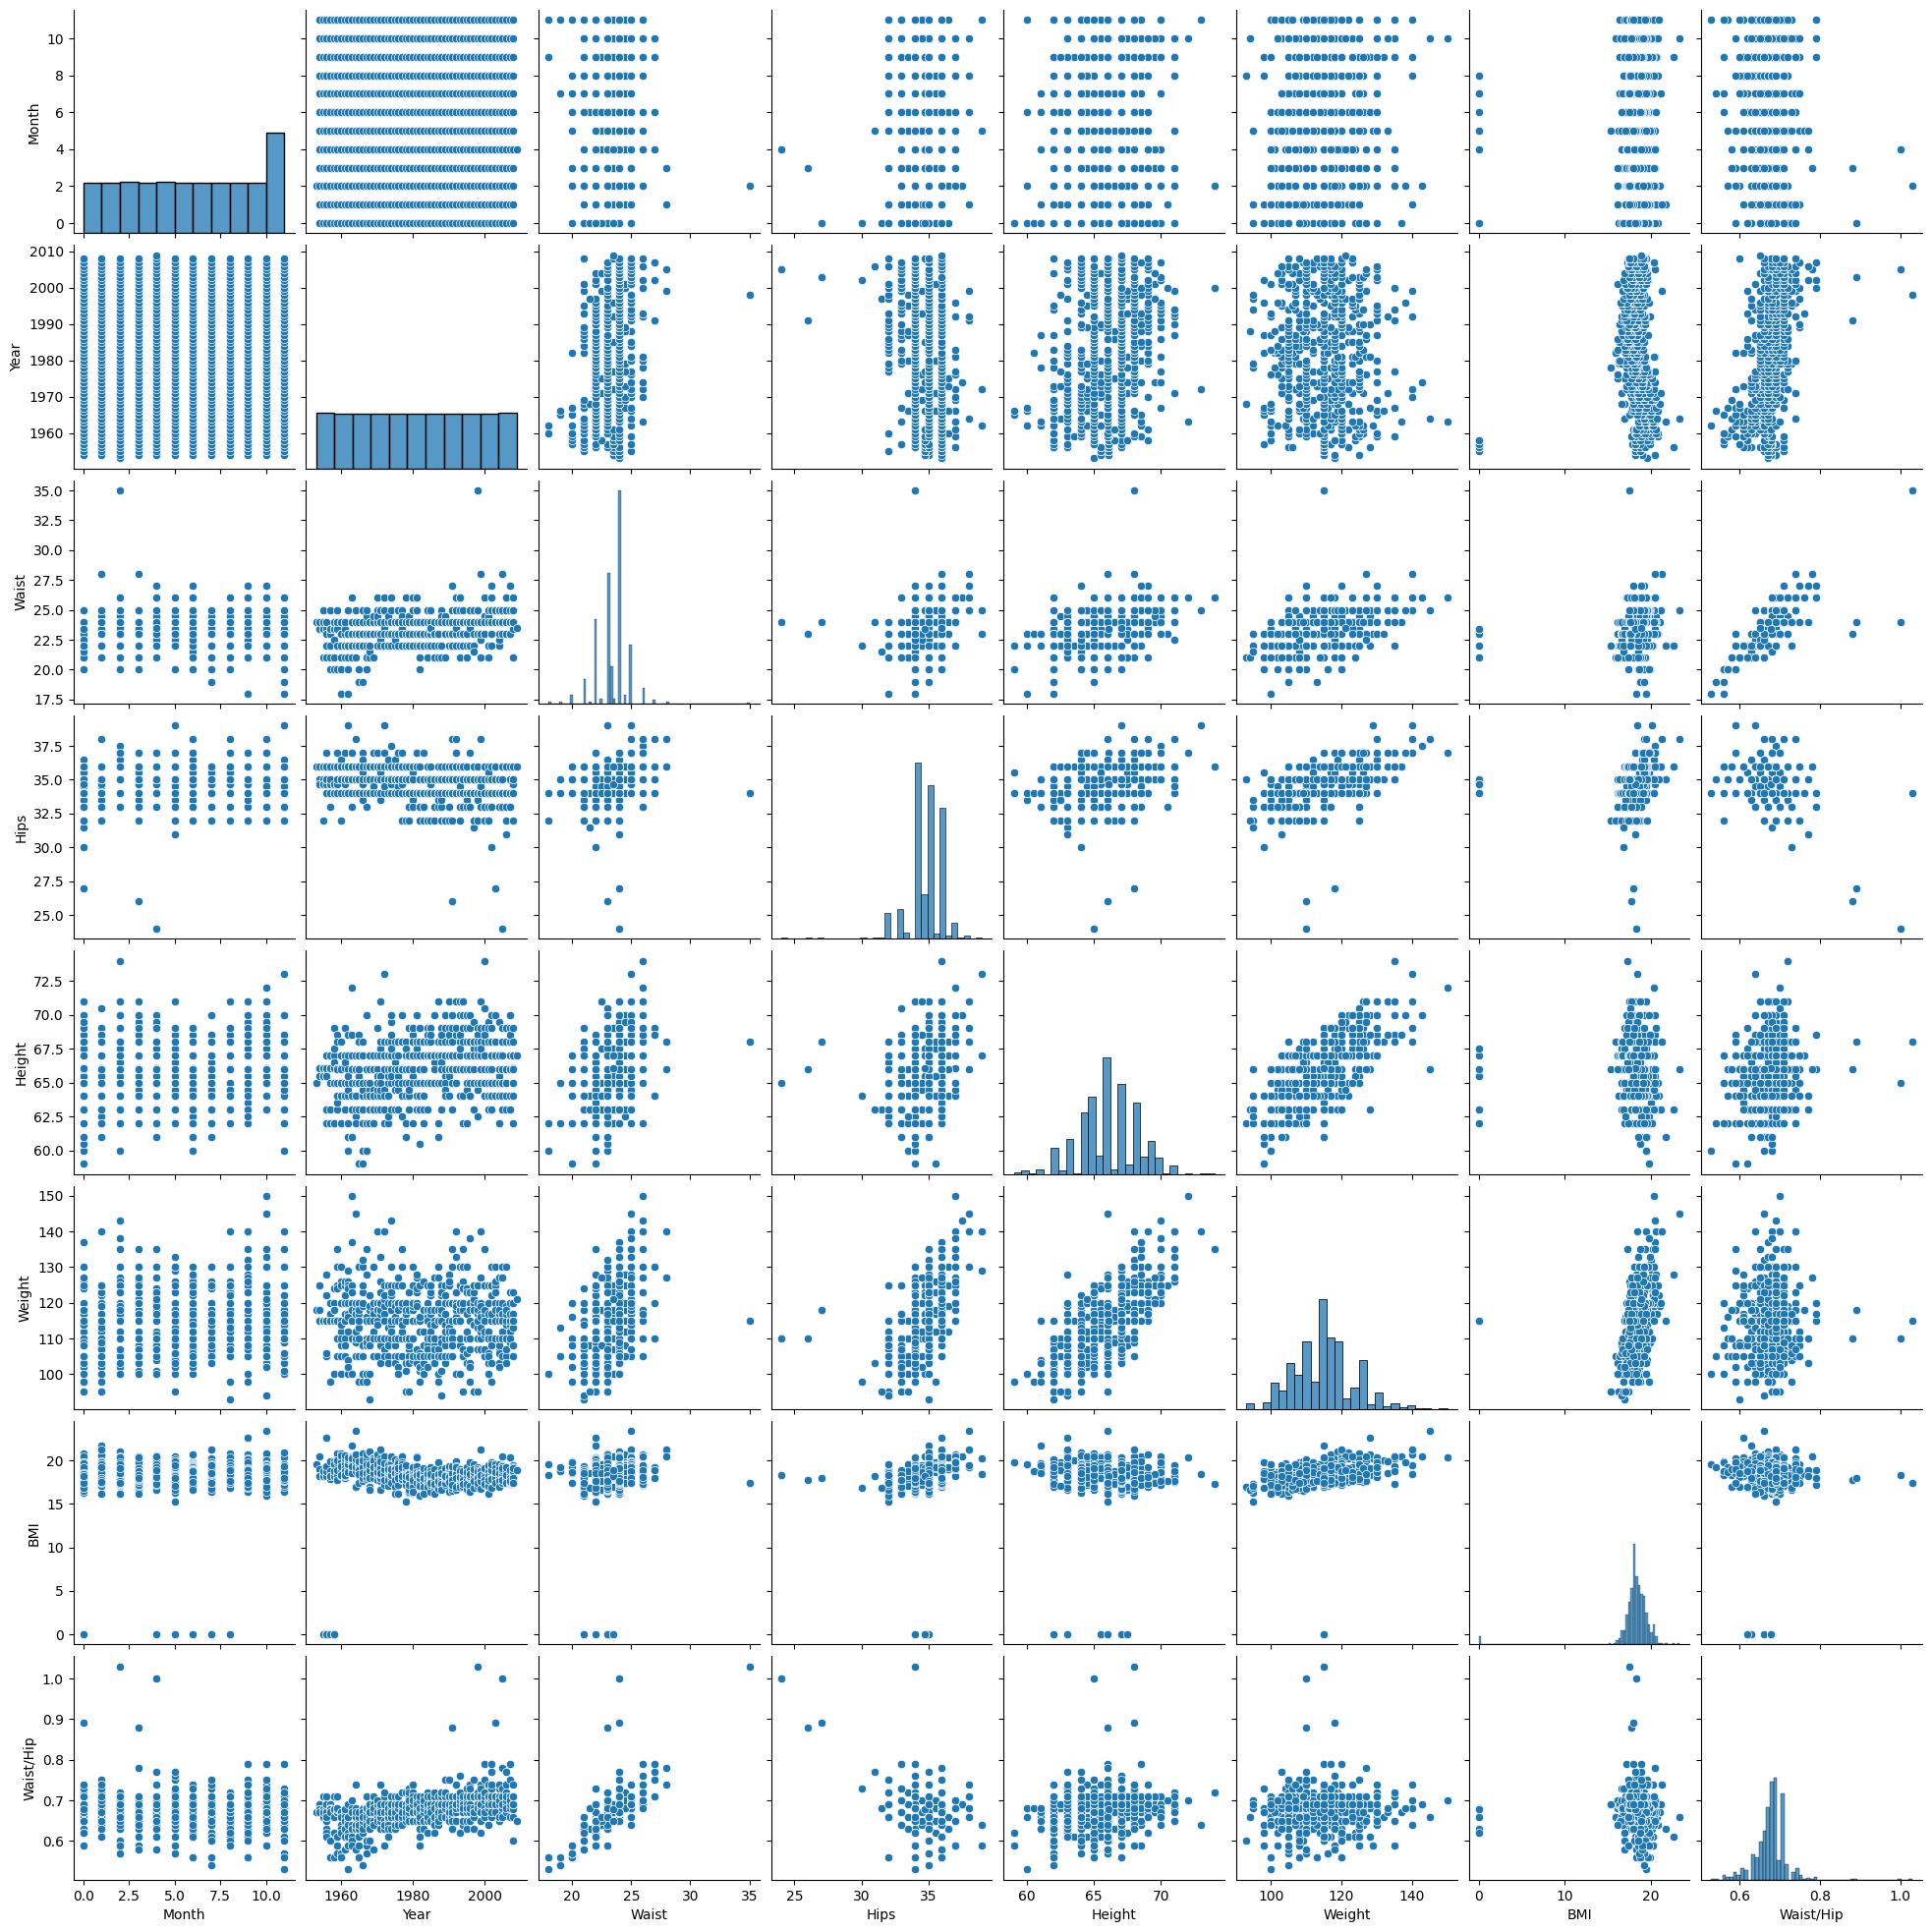

In [24]:
sns.pairplot(df)

In [25]:
import statistics

# Рассчитываем среднее значение для признаков Weight и Height
mean_weight = statistics.mean(df['Weight'])
mean_height = statistics.mean(df['Height'])

print(f"Среднее значение Weight: {mean_weight:.2f}")
print(f"Среднее значение Height: {mean_height:.2f}")


Среднее значение Weight: 114.94
Среднее значение Height: 66.06
